# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ganis Dwiarum Prabandari
- **Email:** ganisdwiarumprabandari@gmail.com
- **ID Dicoding:** [ganis_praban]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim berdasarkan jam dan hari?
- Bagaimana hubungan antara cuaca dan jumlah penggunaan sepeda berdasarkan jam, hari, dan mingguan?

## Import Semua Packages/Library yang Digunakan

In [30]:
#Import Library yang dipakai
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [31]:
# Dataset Bike Sharing hour.csv
data_hour = pd.read_csv('Bike-sharing-dataset/hour.csv')  # Ganti dengan path dataset Anda
print("Data Hour.csv loaded successfully!")
data_hour.head()

Data Hour.csv loaded successfully!


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [32]:
# Dataset Bike Sharing day.csv
data_day = pd.read_csv('Bike-sharing-dataset/day.csv')  # Ganti dengan path dataset Anda
print("Data Day.csv loaded successfully!")
data_day.head()

Data Day.csv loaded successfully!


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- memuat dataset hour.csv yang diunduh dari kaggle.
- memuat dataset day.csv yang diunduh dari kaggle.

### Assessing Data

#### Assessing Data Hour.csv

In [33]:
# Assesing Data hour.csv
print("\nInfo Dataset:")
data_hour.info()


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [34]:
# Menampilkan statistik deskriptif Data Hour
print("\nStatistik Deskriptif:")
data_hour.describe()


Statistik Deskriptif:


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [35]:
# Identifikasi Missing Value DataFrame data_hour
print("\nMissing Values:")
data_hour.isnull().sum()


Missing Values:


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [36]:
# Preview Data Hour
print("\nPreview Data:") 
data_hour.head()


Preview Data:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- memeriksa struktur data untuk memastikan data yang digunakan sesuai dengan yang diharapkan
- memeriksa apakah ada missing value/ adakah nilai data yang hilang pada dataset hour.csv

#### Assesing Data Day.csv

In [37]:
# Assesig Data day.csv
print("\nInfo Dataset:")
data_day.info()


Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [38]:
# Menampilkan statistik deskriptif Data Day
print("\nStatistik Deskriptif:")
data_day.describe()


Statistik Deskriptif:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [39]:
# Identifikasi Missing Value DataFrame data_day
print("\nMissing Values:")
data_day.isnull().sum()


Missing Values:


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [40]:
# Preview Data Day
print("\nPreview Data:")
data_day.head()


Preview Data:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- memeriksa struktur data untuk memastikan data yang digunakan sesuai dengan yang diharapkan
- memeriksa apakah ada missing value/ adakah nilai data yang hilang pada dataset day.csv

### Cleaning Data

#### Cleaning Data data_hour

In [41]:
# Dropping/Menghapus baris dengan nilai yang hilang 
data_hour_clean = data_hour.dropna()

# Dropping/Menghapus duplikasi data
data_hour_clean = data_hour_clean.drop_duplicates()

# Menampilkan informasi setelah pembersihan
print("\nHour Dataset after cleaning:")
data_hour_clean.info()


Hour Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### Cleaning Data data_day

In [42]:
# Dropping/Menghapus baris dengan nilai yang hilang 
data_day_clean = data_day.dropna()

# Dropping/Menghapus duplikasi data
data_day_clean = data_day_clean.drop_duplicates()

print("\nDay Dataset after cleaning:")
data_day_clean.info()


Day Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- menghapus missing value untuk memastikan data yang bersih sebelum analisis lebih lanjut
- menghapus duplicate/duplikasi dari dataframe

## Exploratory Data Analysis (EDA)

### Explore data_hour_clean

In [43]:
# Melihat sample data dari hour.csv
data_hour_clean.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16191,16192,2012-11-12,4,1,11,9,1,1,0,1,0.44,0.4394,0.88,0.1045,60,337,397
13454,13455,2012-07-19,3,1,7,19,0,4,1,1,0.84,0.7576,0.44,0.2537,53,480,533
9416,9417,2012-02-02,1,1,2,6,0,4,1,3,0.36,0.3788,0.90,0.0000,1,73,74
5732,5733,2011-09-01,3,0,9,7,0,4,1,1,0.60,0.5758,0.78,0.0000,7,335,342
9543,9544,2012-02-07,1,1,2,14,0,2,1,1,0.44,0.4394,0.38,0.2537,11,127,138


In [44]:
# Statistik deskriptif untuk dataset hour
print("\nHour Dataset Statistical Summary:")
print(data_hour_clean.describe(include= "all"))

# Korelasi antar variabel numerik di dataset hour
numeric_columns_hour = data_hour_clean.select_dtypes(include=[np.number]).columns
correlation_hour = data_hour_clean[numeric_columns_hour].corr()
print("\nHour Dataset Correlation Matrix:")
print(correlation_hour)



Hour Dataset Statistical Summary:
           instant      dteday        season            yr          mnth  \
count   17379.0000       17379  17379.000000  17379.000000  17379.000000   
unique         NaN         731           NaN           NaN           NaN   
top            NaN  2012-12-31           NaN           NaN           NaN   
freq           NaN          24           NaN           NaN           NaN   
mean     8690.0000         NaN      2.501640      0.502561      6.537775   
std      5017.0295         NaN      1.106918      0.500008      3.438776   
min         1.0000         NaN      1.000000      0.000000      1.000000   
25%      4345.5000         NaN      2.000000      0.000000      4.000000   
50%      8690.0000         NaN      3.000000      1.000000      7.000000   
75%     13034.5000         NaN      3.000000      1.000000     10.000000   
max     17379.0000         NaN      4.000000      1.000000     12.000000   

                  hr       holiday       weekday    

### Explore data_day_clean

In [45]:
# Melihat sample data dari hour.csv
data_day_clean.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
445,446,2012-03-21,2,1,3,0,3,1,2,0.531667,0.513258,0.821250,0.089558,1122,5108,6230
163,164,2011-06-13,2,0,6,0,1,1,1,0.635000,0.601654,0.494583,0.305350,863,4157,5020
144,145,2011-05-25,2,0,5,0,3,1,1,0.660833,0.615542,0.696250,0.154233,740,4238,4978
77,78,2011-03-19,1,0,3,0,6,0,1,0.472500,0.466525,0.379167,0.368167,1424,1693,3117
260,261,2011-09-18,3,0,9,0,0,0,1,0.507500,0.490537,0.695000,0.178483,1353,2921,4274


In [46]:
# Statistik deskriptif untuk dataset day
print("\nDay Dataset Statistical Summary:")
print(data_day_clean.describe(include= "all"))

# Korelasi antar variabel numerik di dataset day
numeric_columns_day = data_day_clean.select_dtypes(include=[np.number]).columns
correlation_day = data_day_clean[numeric_columns_day].corr()
print("\nDay Dataset Correlation Matrix:")
print(correlation_day)



Day Dataset Statistical Summary:
           instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2012-12-31         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000 

### Explore all data

In [47]:
# Mengelompokkan data berdasarkan cuaca dan waktu (jam dan hari)
usage_by_weather_time = data_hour_clean.groupby(['weathersit', 'hr', 'weekday']).agg({'cnt': ['mean', 'sum']}).reset_index()

# Memberi nama ulang kolom
usage_by_weather_time.columns = ['weathersit', 'hour', 'weekday', 'avg_usage', 'total_usage']

# Menampilkan hasil
print("Hubungan antara Cuaca dan Jumlah Penggunaan Sepeda berdasarkan Jam dan Hari:")
usage_by_weather_time.head()

Hubungan antara Cuaca dan Jumlah Penggunaan Sepeda berdasarkan Jam dan Hari:


,weathersit,hour,weekday,avg_usage,total_usage
0,1,0,0,98.253521,6976
1,1,0,1,35.565217,2454
2,1,0,2,29.322581,1818
3,1,0,3,35.457143,2482
4,1,0,4,43.442857,3041


In [48]:
# Mengelompokkan berdasarkan cuaca dan minggu
usage_by_weather_week = data_day_clean.groupby(['weathersit']).agg({'cnt': ['mean', 'sum']}).reset_index()

# Memberi nama ulang kolom
usage_by_weather_week.columns = ['weathersit', 'avg_usage', 'total_usage']

# Menampilkan hasil
print("Hubungan antara Cuaca dan Jumlah Penggunaan Sepeda berdasarkan Minggu:")
usage_by_weather_week.head(4)

Hubungan antara Cuaca dan Jumlah Penggunaan Sepeda berdasarkan Minggu:


,weathersit,avg_usage,total_usage
0,1,4876.786177,2257952
1,2,4035.862348,996858
2,3,1803.285714,37869


**Insight:**
- descriptive statistic -> digunakan untuk memberikan gambaran umum mengenai statistik data, seperti  mean, standard deviasi, dan distribusi dari fitur yang akan digunakan yaitu suhu dan kelembapan
- correlation matrix -> digunakan untuk menghitung korelasi antara fitur numerik tadi unttuk melihat hubungan antara variabel-variabel yang digunakan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan musim berdasarkan jam dan hari?

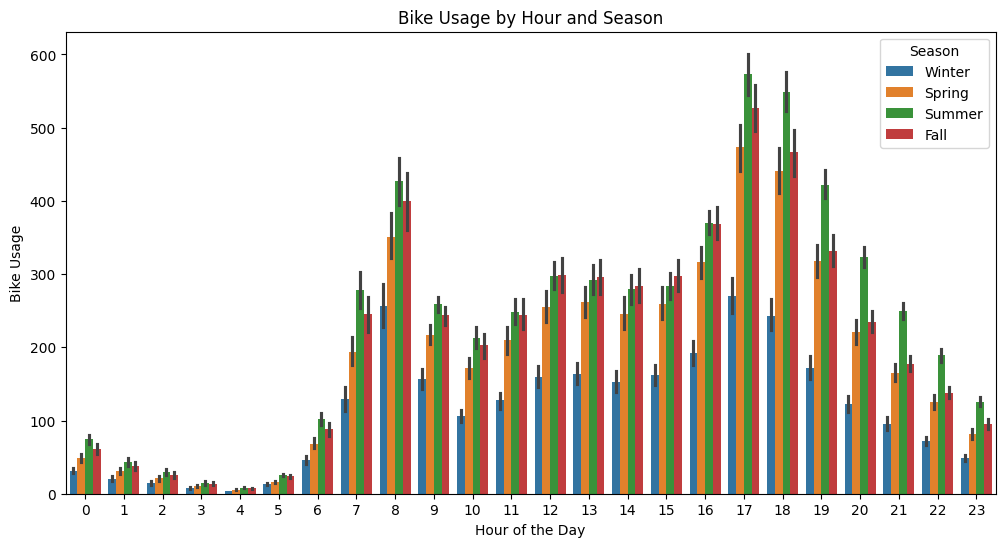

In [49]:
# Menambahkan kolom musim
def season(mnth):
    if mnth in [12, 1, 2]:
        return 'Winter'
    elif mnth in [3, 4, 5]:
        return 'Spring'
    elif mnth in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

data_hour_clean['season'] = data_hour_clean['mnth'].apply(season)

# Boxplot untuk melihat pola penggunaan sepeda berdasarkan musim dan jam
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', hue='season', data=data_hour_clean)
plt.title('Bike Usage by Hour and Season')
plt.xlabel('Hour of the Day')
plt.ylabel('Bike Usage')
plt.legend(title='Season')
plt.show()


**Insight:**
- Descriptive statistic -> digunakan untuk memberikan gambaran umum mengenai statistik data, seperti  mean, standard deviasi, dan distribusi dari fitur yang akan digunakan yaitu suhu dan kelembapan
- Correlation matrix -> digunakan untuk menghitung korelasi antara fitur numerik tadi unttuk melihat hubungan antara variabel-variabel yang digunakan.
- Penggunaan sepeda paling banyak pada jam 17:00 pada musim summer/panas.
- Penggunaan sepeda paling sedikit pada jam 04:00 pada musim winter/dingin.

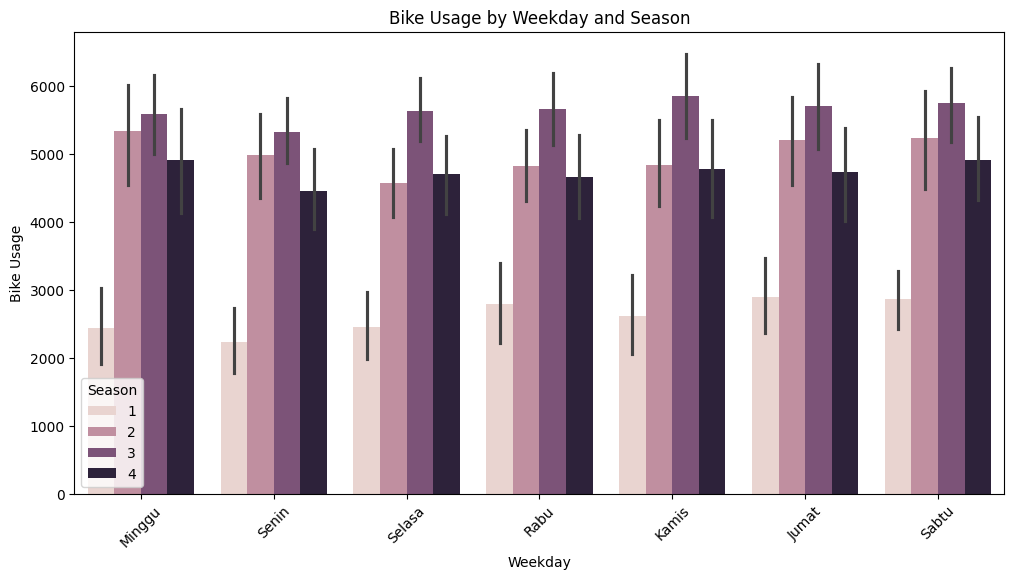

In [50]:
# Mapping angka weekday ke nama hari
weekday_mapping = {
    0: 'Senin',
    1: 'Selasa',
    2: 'Rabu',
    3: 'Kamis',
    4: 'Jumat',
    5: 'Sabtu',
    6: 'Minggu'
}

# Mengganti angka weekday dengan nama hari
data_day_clean['weekday_name'] = data_day_clean['weekday'].map(weekday_mapping)

# Boxplot untuk melihat pola penggunaan sepeda berdasarkan musim dan hari
plt.figure(figsize=(12, 6))
sns.barplot(x='weekday_name', y='cnt', hue='season', data=data_day_clean)
plt.title('Bike Usage by Weekday and Season')
plt.xlabel('Weekday')
plt.ylabel('Bike Usage')
plt.legend(title='Season')
plt.xticks(rotation=45)  # Memutar label x agar mudah dibaca
plt.show()



**Insight:**
- Pada visualisasi di atas, penggunaan sepeda paling banyak pada musim summer/panas pada hari Kamis.
- Penggunaan sepeda paling sedikit pada musim winter/dingin pada hari Selasa.

### Pertanyaan 2: Bagaimana hubungan antara cuaca dan jumlah penggunaan sepeda berdasarkan jam, hari, dan mingguan?

In [51]:
# Mengganti kode cuaca dengan label deskriptif
weather_mapping = {
    1: 'Clear, Few clouds, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}

data_hour_clean['weather_label'] = data_hour_clean['weathersit'].map(weather_mapping)
data_day_clean['weather_label'] = data_day_clean['weathersit'].map(weather_mapping)

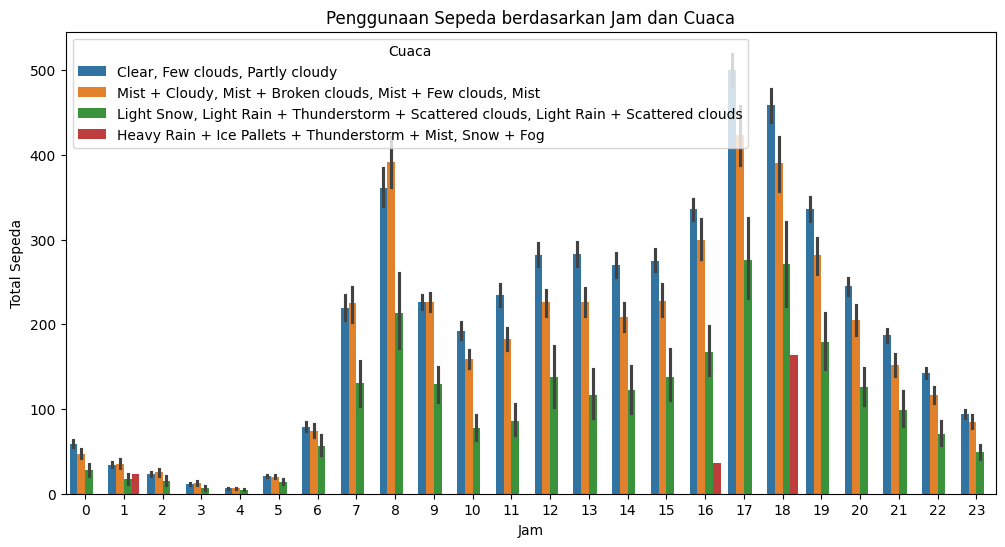

In [52]:
# Boxplot untuk pola penggunaan sepeda berdasarkan cuaca dan jam
plt.figure(figsize=(12, 6))
sns.barplot(x='hr', y='cnt', hue='weather_label', data=data_hour_clean)
plt.title('Penggunaan Sepeda berdasarkan Jam dan Cuaca')
plt.xlabel('Jam')
plt.ylabel('Total Sepeda')
plt.legend(title='Cuaca')
plt.show()


**Insight:**
- Pemilihan boxplot dikarenakan lebih cocok untuk menunjukkan distribusi atau variabilitas penggunaan sededa.

Pengaruh Jam Pada Penggunaan Sepeda:
- Penggunaan sepeda cenderung naik pada jam 07:00 sampai 09:00 pagi dan sore pada jam 17:00 sampai 19:00.
- Penggunaan sepeda menurun pada malam hari 22:00 sampai 06:00 pagi.

Pengaruh Cuaca Pada Penggunaan Sepeda:
- Pada cuaca cerah (Clear/Partly Cloudy) : jumlah penggunaan sepeda tertinggi di semua jam, menunjukkan bahwa cuaca baik mendorong lebih banyak orang untuk bersepeda.
- Pada cuaca berkabut (Mist/Cloudy) : jumlah penggunaan sepeda menurun tetapi tetap signifikan, menunjukkan bahwa kabut atau mendung tidak terlalu menghalangi penggunaan sepeda.
- Pada cuaca hujan atau salju ringan (Light Rain/Snow) : penurunan signifikan terlihat, menunjukkan bahwa hujan atau salju ringan menjadi hambatan utama untuk bersepeda.
- Pada cuaca ekstrem (Heavy Rain/Snow) : hampir tidak ada penggunaan sepeda pada cuaca ekstrem, yang menunjukkan bahwa kondisi ini sepenuhnya menghambat aktivitas bersepeda.

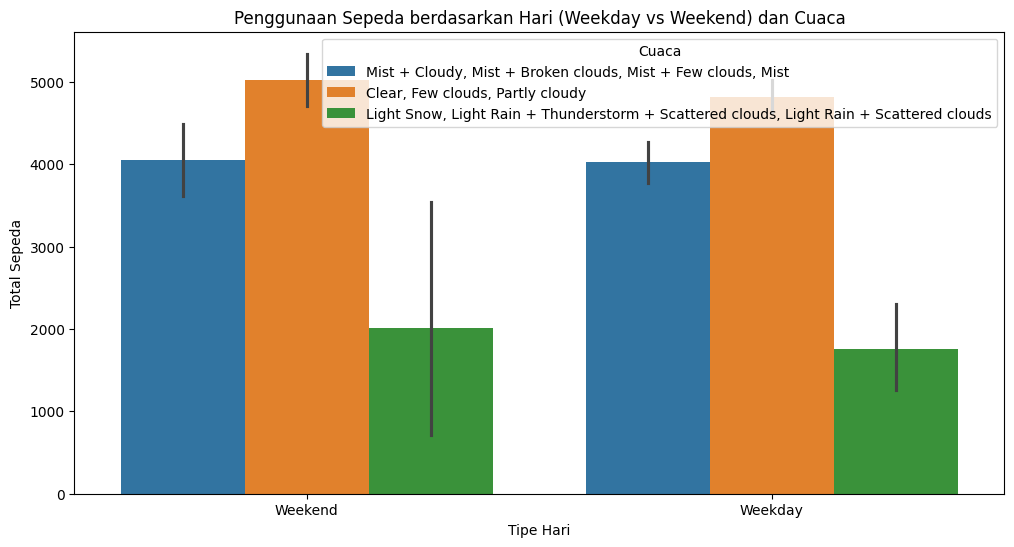

In [53]:
# Boxplot untuk penggunaan sepeda berdasarkan cuaca dan hari (weekday vs weekend)
data_day_clean['day_type'] = data_day_clean['weekday'].apply(lambda x: 'Weekend' if x in [5, 6] else 'Weekday')

plt.figure(figsize=(12, 6))
sns.barplot(x='day_type', y='cnt', hue='weather_label', data=data_day_clean)
plt.title('Penggunaan Sepeda berdasarkan Hari (Weekday vs Weekend) dan Cuaca')
plt.xlabel('Tipe Hari')
plt.ylabel('Total Sepeda')
plt.legend(title='Cuaca')
plt.show()


**Insight:**

Pengaruh hari kerja dan cuaca pada penggunaan sepeda:
- Penggunaan sepeda ketika hari kerja lebih banyak pada jam sibuk (pagi dan sore).
- Pengaruh cuaca terlihat lebih signifikan, terutama selama jam sibuk.

Pengaruh akhir pekan dan cuaca pada penggunaan sepeda:
- Pola penggunaan sepeda lebih merata sepanjang hari, dengan puncak sedikit lebih tinggi pada jam 10:00 sampai 16:00.
- Cuaca cerah lebih mendukung aktivitas penggunaan sepeda pada akhir pekan.

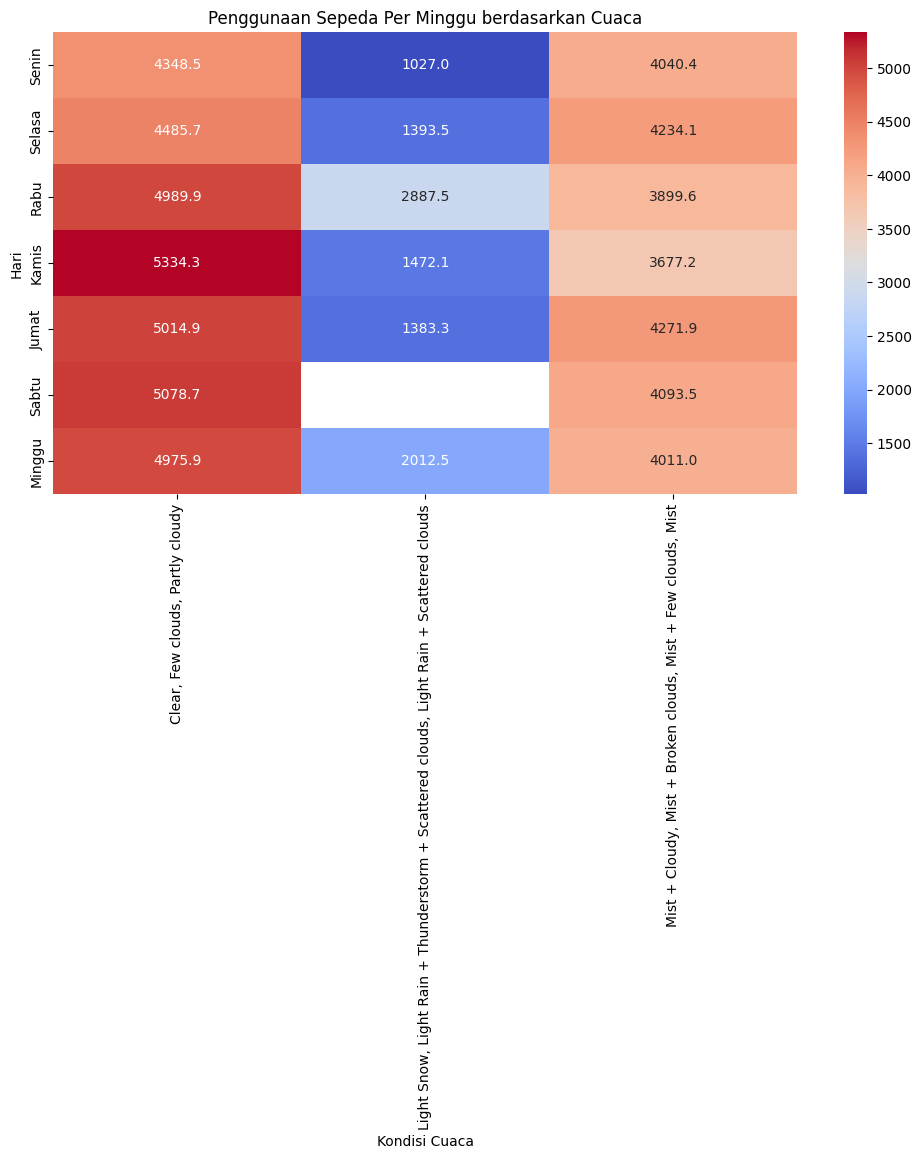

In [54]:
# Mapping nilai weekday ke nama hari
weekday_map = {
    0: "Senin",
    1: "Selasa",
    2: "Rabu",
    3: "Kamis",
    4: "Jumat",
    5: "Sabtu",
    6: "Minggu"
}

# Menambahkan kolom nama hari
data_day_clean['weekday_name'] = data_day_clean['weekday'].map(weekday_map)

# Pivot table untuk penggunaan sepeda berdasarkan hari dalam seminggu dan cuaca
day_weather_pivot = data_day_clean.pivot_table(
    index='weekday_name',
    columns='weather_label',
    values='cnt',
    aggfunc='mean'
)

# Urutkan nama hari sesuai dengan urutan mingguan
day_weather_pivot = day_weather_pivot.reindex(
    ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]
)

# Heatmap untuk menggambarkan hubungan antara cuaca dan penggunaan sepeda per hari dalam seminggu
plt.figure(figsize=(12, 6))
sns.heatmap(day_weather_pivot, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Penggunaan Sepeda Per Minggu berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Hari')
plt.show()


**Insight:**
- Dari data visualisasi heatmap ini menggambarkan pengaruh hari dan cuaca dalam penggunaan sepeda.
- Pengaruh cuaca juga memiliki dampak yang signifikan terhadapt jumlah penggunaan sepeda, apalagi pada cuaca buruk.
- Penggunaan sepeda lebih banyak pada cuaca clear, few, clouds, partly cloudy dengan hari Kamis, Jumat, dan Sabtu.

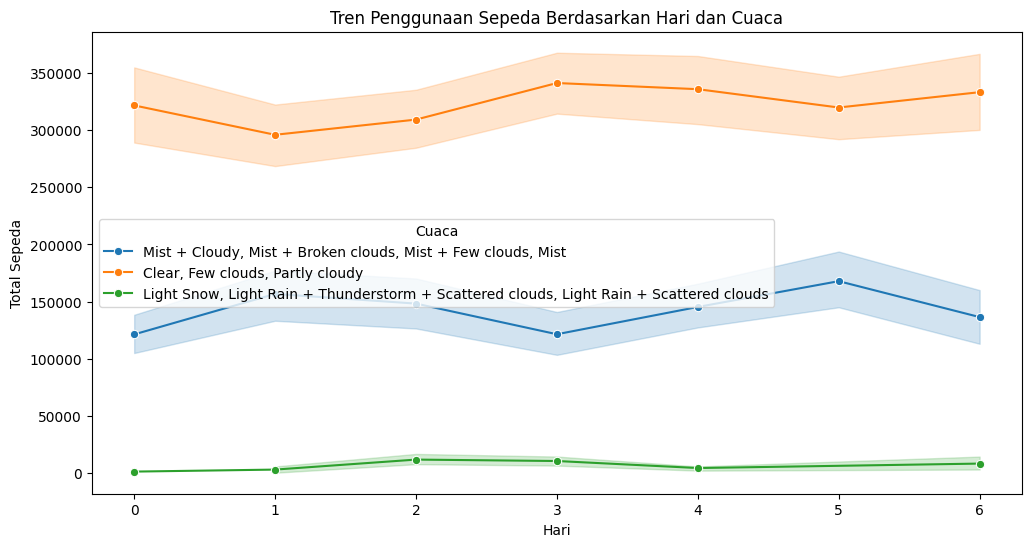

In [55]:
# Visualisasi tren mingguan penggunaan sepeda berdasarkan cuaca
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_day_clean, x='weekday', y='cnt', hue='weather_label', estimator='sum', marker='o')
plt.title('Tren Penggunaan Sepeda Berdasarkan Hari dan Cuaca')
plt.xlabel('Hari')
plt.ylabel('Total Sepeda')
plt.legend(title='Cuaca')
plt.show()


**Insight:**
- Pada cuaca cerah (warna orange) menunjukkan jumlah penggunaan sepeda paling banyak digunakan dan merata pada semua hari/weekday.
- Pada cuaca buruk terjadi penurunan jumlah penggunaan sepeda.

## Conclusion

Bagaimana pola penggunaan sepeda berdasarkan musim berdasarkan jam dan hari?
Conclution pertanyaan 1
- Berdasarkan pola penggunaan sepeda pada dataset tersebut, penggunaan sepeda paling banyak digunakan pada musim panas (summer) dibandingkan musin yang lainnya.
- Penggunaan terendah terjadi pada musim dingin (winter) karena cuaca dingin kurang mendukung aktivitas di luar ruangan.
- Puncak penggunaan sepeda terjadi pada pagi hari pukul 07:00 sampai 09:00 dan sore 17:00 sampai 19:00.
- Penggunaan sepeda paling rendah pada tengah malam hingga dini hari pada pukul 00:00 sampai 05:00.
- Penggunaan sepeda lebih tinggi pada hari kerja yaitu Senin hingga Jumat.

Bagaimana hubungan antara cuaca dan jumlah penggunaan sepeda berdasarkan jam, hari, dan mingguan?
Conclution pertanyaan 2
- Penggunaan sepeda paling tinggi terjadi pada kondisi cuaca cerah atau berawan sebagian.
- Penggunaan menurun drastis pada kondisi hujan deras, badai, atau salju, yang membuat aktivitas bersepeda menjadi kurang nyaman bahkan berbahaya.
- Dalam kondisi cuaca yang mendukung, pola penggunaan sepeda mengikuti pola harian yang sama yaitu puncak di pagi dan sore hari.
- Pada hari hujan atau badai, penggunaan sepeda berkurang signifikan di semua jam.
- Pada hari-hari dengan cuaca cerah, pola penggunaan tetap konsisten tinggi di seluruh hari kerja.
- Akhir pekan yang cerah juga menunjukkan peningkatan penggunaan sepeda untuk aktivitas rekreasi.
- Hari-hari dengan cuaca buruk (hujan deras atau salju) cenderung menunjukkan penurunan di seluruh hari.
- Penggunaan sepeda tertinggi terjadi pada minggu dengan cuaca mayoritas cerah atau mendung ringan.
- Tren mingguan menunjukkan penurunan signifikan selama minggu-minggu dengan intensitas hujan atau badai yang lebih tinggi.